In [2]:
%matplotlib inline

# Bokeh for interactive, Seaborn for static

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid", palette="pastel")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from math import pi
import glob

In [71]:
MIN_ITERS = 150

fsm01_param_files = '../experiments/fsm-0-1/seed*/outcmaesxrecentbest.dat'
bnn01_param_files = '../experiments/bnn-0-1/seed*/outcmaesxrecentbest.dat'
tws01_param_files = '../experiments/bnn_twist-0-1/seed*/outcmaesxrecentbest.dat'

# fsm302_param_files = '../experiments/fsm-30-2/seed*/outcmaesxrecentbest.dat'
# bnn302_param_files = '../experiments/bnn-30-2/seed*/outcmaesxrecentbest.dat'

fsm402_param_files = '../experiments/fsm-40-2/seed*/outcmaesxrecentbest.dat'
bnn402_param_files = '../experiments/bnn-40-2/seed*/outcmaesxrecentbest.dat'
tws402_param_files = '../experiments/bnn_twist-40-2/seed*/outcmaesxrecentbest.dat'

def range_transform(x, a, b, c, d):
    return (x - a) * (d - c) / (b - a) + c

def get_data_from_file(glob_dir, header):
    data, data_lens = [], []
    for pop_filepath in sorted(glob.iglob(glob_dir, recursive=True)):
        data.append(pd.read_csv(pop_filepath
                                , comment='%'
                                , header=None
                                , names=header
                                , usecols=['fitness', 'iter']
                                , sep=' '))
        data[-1]['fitness'] = (data[-1]['fitness'] * -1) + 1
        
        len_of_df = len(data[-1].index)
        if len_of_df < MIN_ITERS:
            
            new_iters = list(range(len_of_df+1, MIN_ITERS+1))
            new_fitness = [data[-1]['fitness'].iloc[-1]] * (MIN_ITERS - len_of_df)
            
            fitness_pad_df = pd.DataFrame(list(zip(new_iters, new_fitness)), columns=['iter', 'fitness'])
            data[-1] = data[-1].append(fitness_pad_df, ignore_index=True)
        
        data[-1].drop(data[-1][data[-1].index > 150].index)
            
#         data_lens.append(len(data[-1].index))
#     print(f'Max iters: {max(data_lens)}, Min iters: {min(data_lens)}')
    return data


cmaes_header = ['iter', 'evals', 'sigma', '0', 'fitness']
fsm_header = cmaes_header + ['param' + str(i)  for i in range(15)]
bnn_header = cmaes_header + ['param' + str(i)  for i in range(17)]


fsm01_replicates = get_data_from_file(fsm01_param_files, fsm_header)
print('Found', len(fsm01_replicates), 'data files in', fsm01_param_files)
fsm01_df = pd.concat(fsm01_replicates, ignore_index=True).assign(experiment='FSM')

fsm402_replicates = get_data_from_file(fsm402_param_files, fsm_header)
print('Found', len(fsm402_replicates), 'data files in', fsm402_param_files)
fsm402_df = pd.concat(fsm402_replicates, ignore_index=True).assign(experiment='FSM')


bnn01_replicates = get_data_from_file(bnn01_param_files, bnn_header)
print('Found', len(bnn01_replicates), 'data files in', bnn01_param_files)
bnn01_df = pd.concat(bnn01_replicates, ignore_index=True).assign(experiment='ANN Direct')

bnn402_replicates = get_data_from_file(bnn402_param_files, bnn_header)
print('Found', len(bnn402_replicates), 'data files in', bnn402_param_files)
bnn402_df = pd.concat(bnn402_replicates, ignore_index=True).assign(experiment='ANN Direct')


tws01_replicates = get_data_from_file(tws01_param_files, bnn_header)
print('Found', len(tws01_replicates), 'data files in', tws01_param_files)
tws01_df = pd.concat(tws01_replicates, ignore_index=True).assign(experiment='ANN Twist')

tws402_replicates = get_data_from_file(tws402_param_files, bnn_header)
print('Found', len(tws402_replicates), 'data files in', tws402_param_files)
tws402_df = pd.concat(tws402_replicates, ignore_index=True).assign(experiment='ANN Twist')


df_01 = pd.concat([fsm01_df, bnn01_df, tws01_df], ignore_index=True)
df_402 = pd.concat([fsm402_df, bnn402_df, tws402_df], ignore_index=True)

Found 20 data files in ../experiments/fsm-0-1/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/fsm-40-2/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn-0-1/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn-40-2/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn_twist-0-1/seed*/outcmaesxrecentbest.dat
Found 20 data files in ../experiments/bnn_twist-40-2/seed*/outcmaesxrecentbest.dat


/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


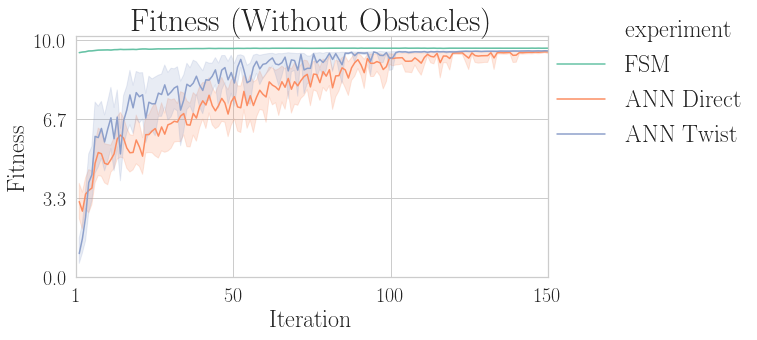

In [74]:
num_obst = 0

ticksize = 20
labelsize = 24
legendsize = labelsize
titlesize = 32

fsize = 16/2, 9/2
fig, ax = plt.subplots(figsize=fsize)

if num_obst == 0:
    df = df_01
    colors = sns.color_palette(['#66c2a5','#fc8d62','#8da0cb'])
else:
    df = df_402
    colors = sns.color_palette(['#1b9e77','#d95f02','#7570b3'])

sns.lineplot(x='iter', y='fitness', hue='experiment', data=df, palette=colors)


gens = MIN_ITERS
ax.set_xlim((0, gens-1))

xticks = np.linspace(0, gens-1, 4)
ax.set_xticks(xticks)
ax.set_xticklabels([int(xval + 1) for xval in xticks], fontsize=ticksize)
ax.set_xlabel('Iteration', fontsize=labelsize)
ax.set_xlim([0, gens - 1])

yticks = np.linspace(0, 10, num=4)
ax.set_yticks(yticks)
ax.set_yticklabels([round(yval, 1) for yval in yticks], fontsize=ticksize)
ax.set_ylabel('Fitness', fontsize=labelsize)

plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles
                , labels
                , loc=(1, 0.5)
                , fontsize=legendsize
                , frameon=False)#, bbox_to_anchor=(0.5,-0.1))

if num_obst == 0:
    title = 'Fitness (Without Obstacles)'
else:
    title = 'Fitness (With Obstacles)'

ttl = ax.set_title(title, fontsize=titlesize)

In [75]:
fig_filename = 'fitness-with.png'
if num_obst == 0:
    fig_filename = 'fitness-without.png'
    
fig.savefig(fig_filename, bbox_extra_artists=(lgd,), bbox_inches='tight')

/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/ajc/miniconda

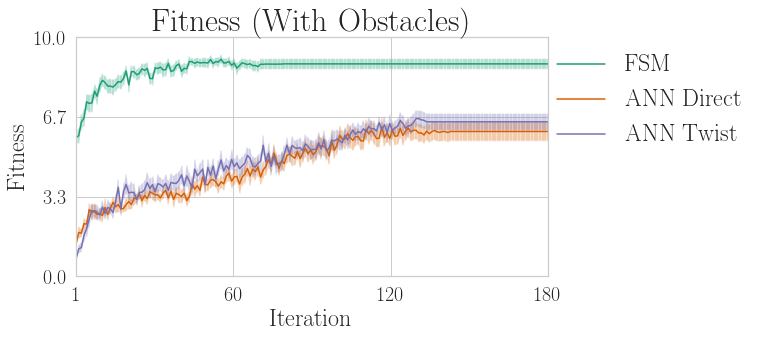

In [35]:
##########
# OLD CODE
##########

num_obst = 40

ticksize = 20
labelsize = 24
legendsize = labelsize
titlesize = 32

def plot_generational_fitness(dfs, col, name, color, ls):
    data = np.zeros((len(dfs), 2500))

    for i, r in enumerate(dfs):
        data[i, :len(r[col])] = r[col]
        data[i, len(r[col]):] = r[col].iloc[-1]
    # unit_traces is very useful (ci_band and ci_bars are 1 std by default (68%))
    return sns.tsplot(data=data, 
                      color=color,
                      condition=name, ax=ax,
                      err_style=('ci_band', 'ci_bars'))

#     return sns.lineplot(ax=ax
#                         , data=data
#                         , color=color
# #                         , condition=name
# #                         , 
#                        )


fsize = 16/2, 9/2
fig, ax = plt.subplots(figsize=fsize)
colors = sns.color_palette("RdBu", n_colors=4)
# ['#fc8d59','#ffffbf','#91bfdb']
# ['#1b9e77','#d95f02','#7570b3']
# ['#66c2a5','#fc8d62','#8da0cb']
colors = sns.color_palette(['#1b9e77','#d95f02','#7570b3','#66c2a5','#fc8d62','#8da0cb'])

if num_obst == 0:
    plot_generational_fitness(fsm01_replicates, 'fitness', 'FSM', colors[3], '-')
    plot_generational_fitness(bnn01_replicates, 'fitness', 'ANN Direct', colors[4], '--')
    plot_generational_fitness(tws01_replicates, 'fitness', 'ANN Twist', colors[5], ':')
    title = 'Fitness (Without Obstacles)'
else:
    plot_generational_fitness(fsm402_replicates, 'fitness', 'FSM', colors[0], '-')
    plot_generational_fitness(bnn402_replicates, 'fitness', 'ANN Direct', colors[1], '--')
    plot_generational_fitness(tws402_replicates, 'fitness', 'ANN Twist', colors[2], ':')
    title = 'Fitness (With Obstacles)'


gens = 180
ax.set_xlim((0, gens-1))

xticks = np.linspace(0, gens-1, 4)
ax.set_xticks(xticks)
ax.set_xticklabels([int(xval + 1) for xval in xticks], fontsize=ticksize)
ax.set_xlabel('Iteration', fontsize=labelsize)
ax.set_xlim([0, gens - 1])

yticks = np.linspace(0, 10, num=4)
ax.set_yticks(yticks)
ax.set_yticklabels([round(yval, 1) for yval in yticks], fontsize=ticksize)
ax.set_ylabel('Fitness', fontsize=labelsize)

# sns.despine(top=True, bottom=True, left=True, right=True)
# sns.despine(top=True, left=True)
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=(1, 0.5), fontsize=legendsize, frameon=False)#, bbox_to_anchor=(0.5,-0.1))

ttl = ax.set_title(title, fontsize=titlesize)

In [12]:
fig_filename = 'fitness-with.png'
if num_obst == 0:
    fig_filename = 'fitness-without.png'
    
fig.savefig(fig_filename, bbox_extra_artists=(lgd,), bbox_inches='tight')

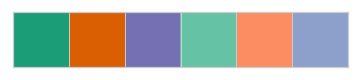

In [13]:
sns.palplot(sns.color_palette(['#1b9e77','#d95f02','#7570b3','#66c2a5','#fc8d62','#8da0cb']))

In [56]:
fsm01_replicates[0].describe()

,iter,fitness
count,805.000000,805.000000
mean,403.000000,9.666431
std,232.527776,0.021144
min,1.000000,9.440000
25%,202.000000,9.660000
50%,403.000000,9.670000
75%,604.000000,9.676667
max,805.000000,9.703333


In [57]:
fsm01_replicates[1].describe()

,iter,fitness
count,700.00000,700.000000
mean,350.50000,9.658943
std,202.21688,0.021171
min,1.00000,9.476667
25%,175.75000,9.653333
50%,350.50000,9.663333
75%,525.25000,9.670000
max,700.00000,9.696667


In [58]:
fsm01_df.describe()

,iter,fitness
count,17135.000000,17135.000000
mean,471.431573,9.662061
std,326.428025,0.018770
min,1.000000,9.400000
25%,215.000000,9.656667
50%,429.000000,9.663333
75%,654.000000,9.670000
max,1590.000000,9.706500
